In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head(50)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df2.count()

location      13319
size          13304
total_sqft    13320
bath          13247
price         13320
dtype: int64

In [7]:
df2['bath']=df2['bath'].fillna(df2['bath'].median())
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [8]:
#remove the null values in the size
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3['size'].head()

0        2 BHK
1    4 Bedroom
2        3 BHK
3        3 BHK
4        2 BHK
Name: size, dtype: object

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\DEENA\AppData\Local\Temp\ipykernel_10080\1156995945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df3[df3['BHK']>15]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [15]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [18]:
import re
def convert_range_num(x):

    pattern1 = r'Sq. Meter'
    pattern2 = r'Perch'
    pattern3 = r'Sq. Yards'
    pattern4 = r'Acres'
    pattern5 = r'Cents'
    pattern6 = r'Guntha'
    pattern7 = r'Grounds'
    res1 = re.search(pattern1,x)
    res2 = re.search(pattern2,x)
    res3 = re.search(pattern3,x)
    res4 = re.search(pattern4,x)
    res5 = re.search(pattern5,x)
    res6 = re.search(pattern6,x)
    res7 = re.search(pattern7,x)
    tokens = x.split('-')
    if len(tokens)==2:
        return round((float(tokens[0])+float(tokens[1]))/2,2)
    elif(res1):
        substr= re.split(pattern1,x)
        a = float(substr[0])
        return round(a*10.76,2)
    elif(res2):
        substr= re.split(pattern2,x)
        a = float(substr[0])
        return round(a*272.25,2)
    elif(res3):
        substr= re.split(pattern3,x)
        a = float(substr[0])
        return round(a*9,2)
    elif(res4):
        substr= re.split(pattern4,x)
        a = float(substr[0])
        return round(a*43560,2)
    elif(res5):
        substr= re.split(pattern5,x)
        a = float(substr[0])
        return round(a*435.56,2)
    elif(res6):
        substr= re.split(pattern6,x)
        a = float(substr[0])
        return round(a*1089,2)
    elif(res7):
        substr= re.split(pattern7,x)
        a = float(substr[0])
        return round(a*2400,2)
    else:
        return round(float(x),2)


In [19]:
convert_range_num('1Grounds')

2400.0

In [20]:
df4=df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_range_num)
df4.head(12)
df4.shape

(13303, 6)

In [21]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [22]:
len(location_stats[location_stats<=10])

1052

In [23]:
location_stats_under_10 = location_stats[location_stats<=10]
location_stats_under_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [24]:
df4.location = df4.location.apply(lambda x:'other' if x in location_stats_under_10 else x)

In [25]:
len(df4.location.unique())

242

In [26]:
df5=df4.copy()

In [27]:
df5['price_per_sqft']=round(df5['price']*100000/df5['total_sqft'],2)
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [28]:
# taking 300 to be the reference for total_sqft require for 1bhk 
df5[df5.total_sqft/df5.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.00


In [29]:
df5.location = df5.location.apply(lambda x: x.strip())
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [30]:
#removing the outlier accourding to above criterion
df6 = df5[~(df5.total_sqft/df5.BHK<300)]
df6.shape

(12555, 7)

In [31]:
#in a property it is not ideal to have bath more than bhk+2
#dropping the data with extra number of bathrooms
df7=df6[~(df6.bath>df6.BHK+2)]

In [32]:
df7.shape

(12546, 7)

In [33]:
df7.price_per_sqft.describe()

count     12546.000000
mean       6286.051793
std        4107.166520
min           2.260000
25%        4205.795000
50%        5291.010000
75%        6916.032500
max      176470.590000
Name: price_per_sqft, dtype: float64

In [34]:
#according to the location we need to remove the outlier
def remove_outlier_ppsf(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

df8 = remove_outlier_ppsf(df7)
df8.shape

(10297, 7)

In [35]:
df8[df8.price_per_sqft<100].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1377,Bommenahalli,3 Bedroom,653400.0,3.0,217.0,3,33.21


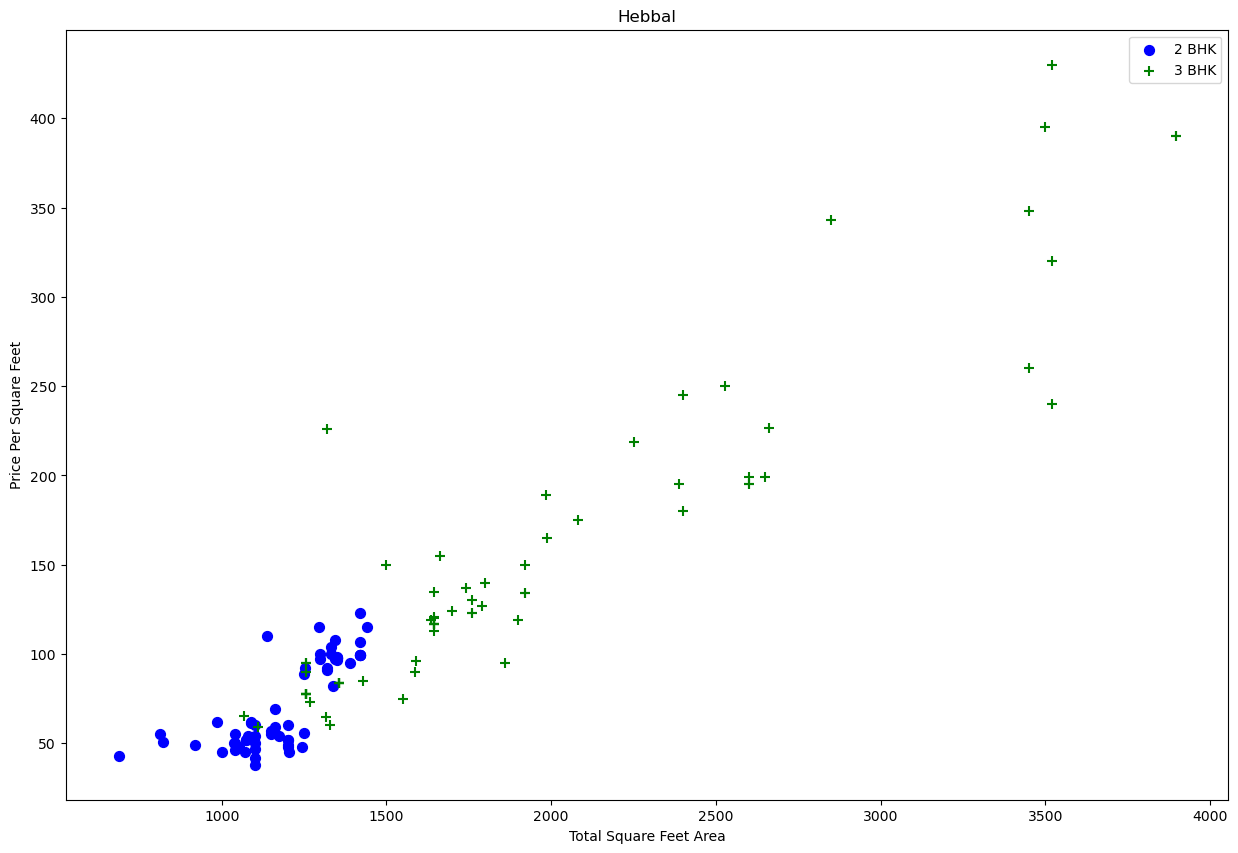

In [36]:
#the same location has price of 2bhk more than 3 bhk for almost same sqft

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label = '2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = '+',color='green', label = '3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Hebbal")


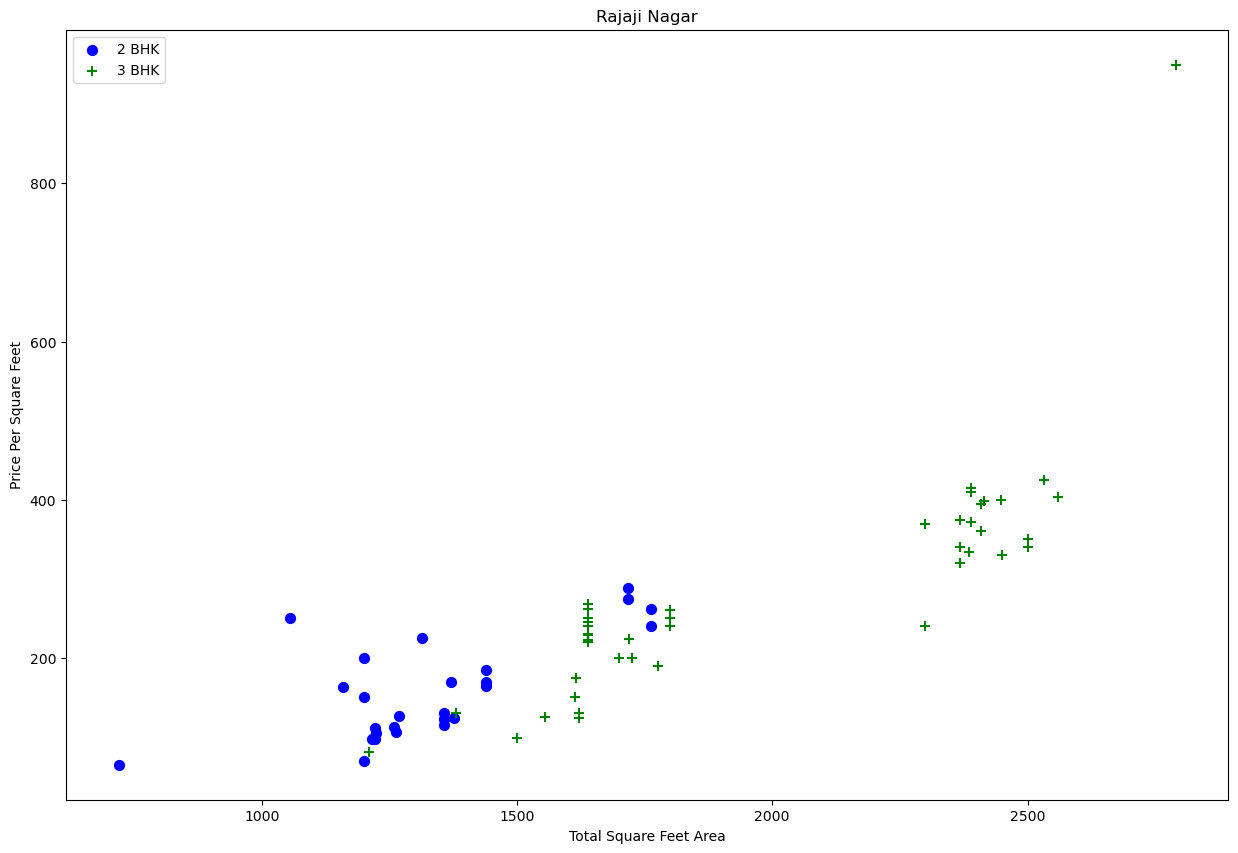

In [37]:
plot_scatter_chart(df7,"Rajaji Nagar")

(7894, 7)

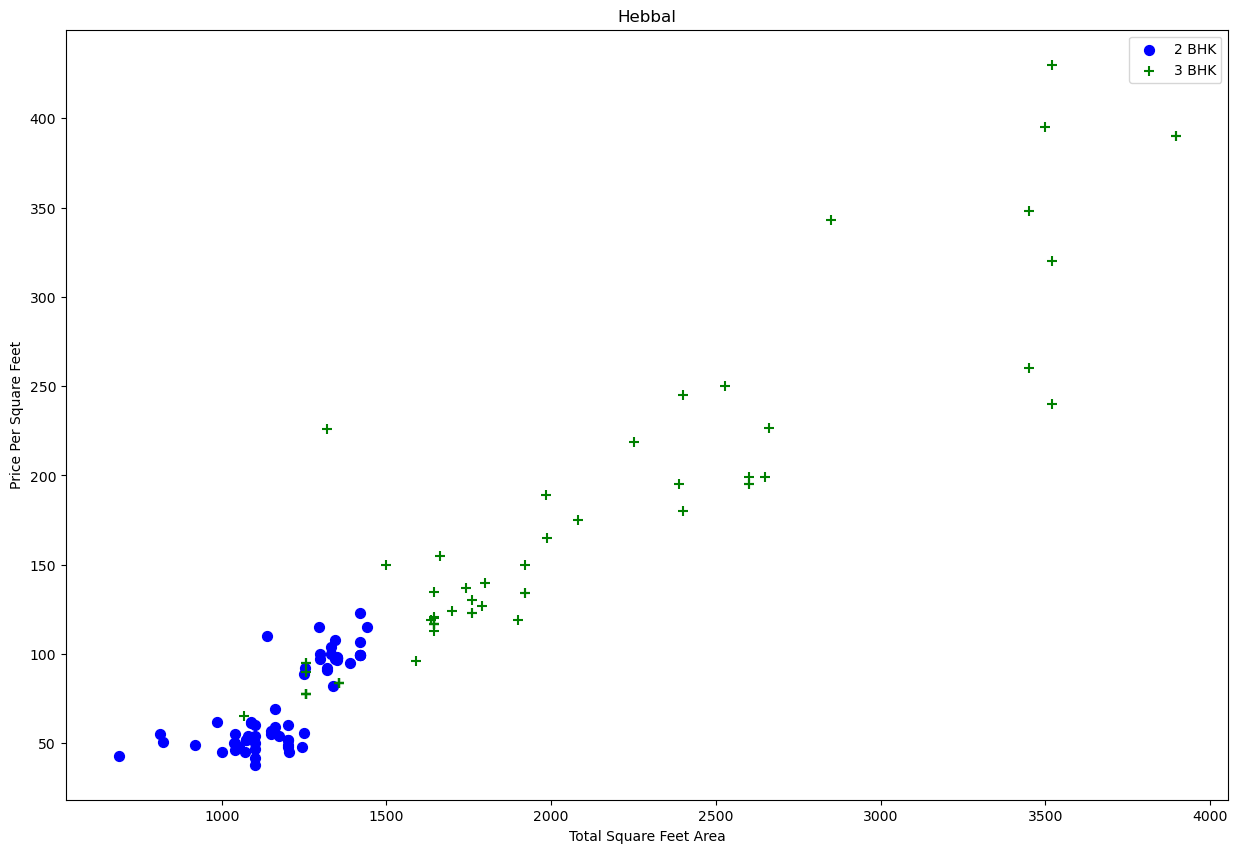

In [38]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>2:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis ="index")

df8 = remove_bhk_outlier(df7)
                
plot_scatter_chart(df8,"Hebbal")
df8.shape

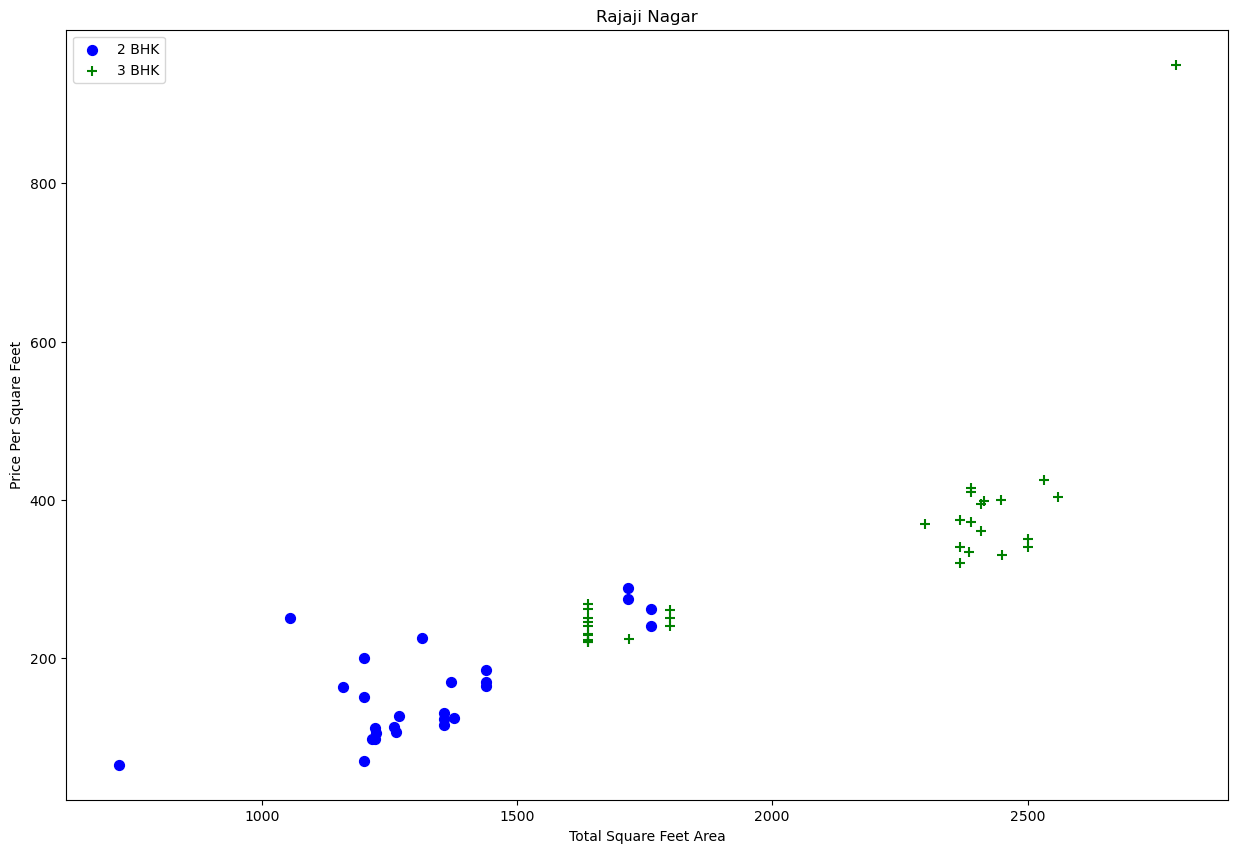

In [39]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

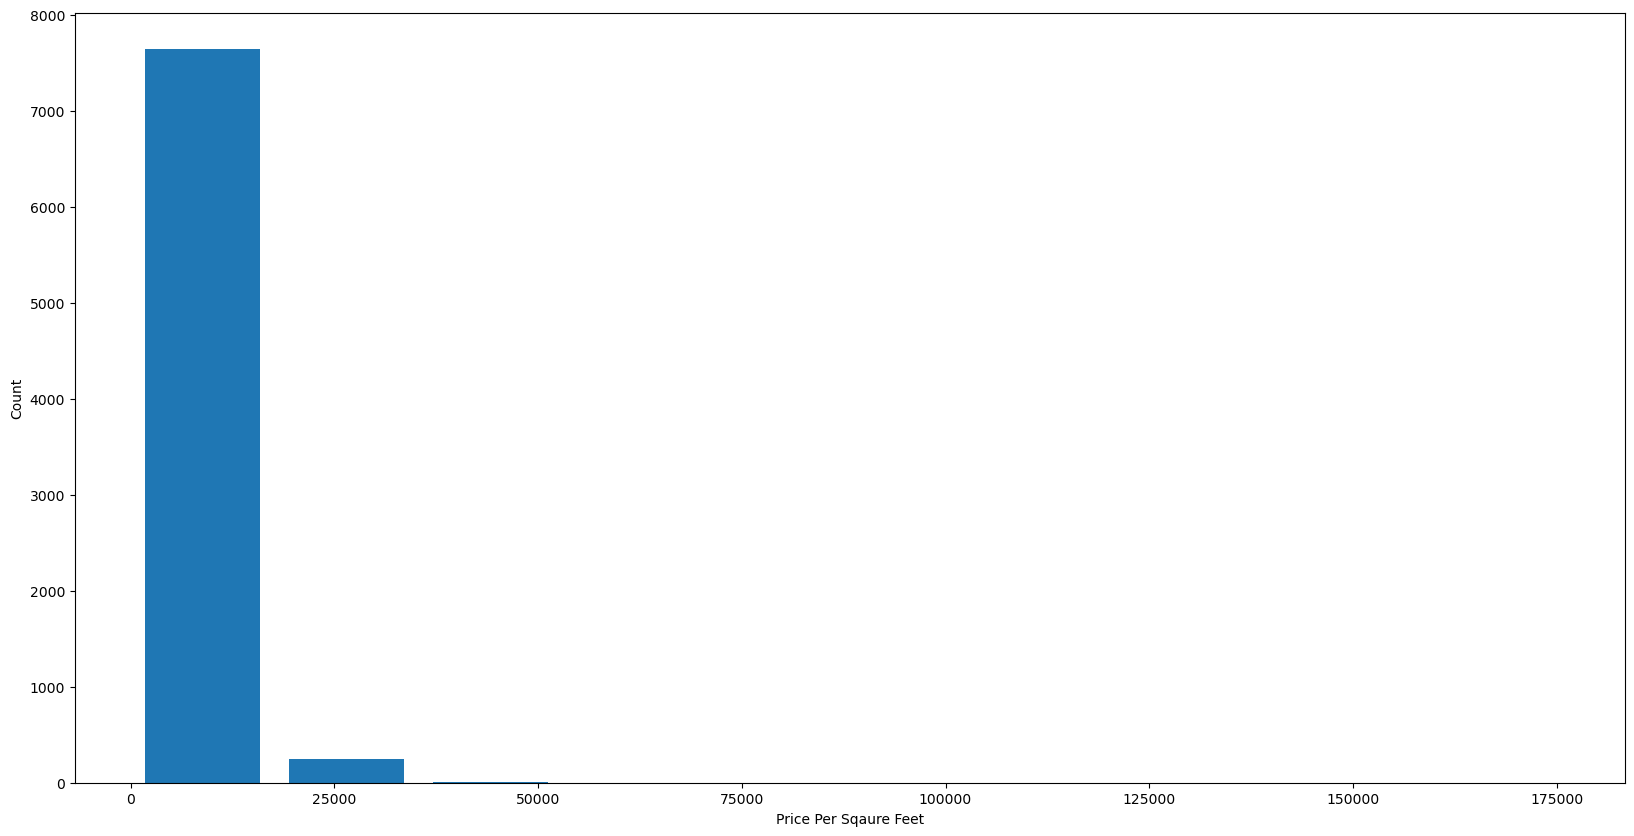

In [40]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Sqaure Feet')
plt.ylabel('Count')

In [41]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
3609,other,16 BHK,10000.0,16.0,550.0,16,5500.00
7979,other,11 BHK,6000.0,12.0,150.0,11,2500.00
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.00
9935,other,13 BHK,5425.0,13.0,275.0,13,5069.12


Text(0, 0.5, 'Count')

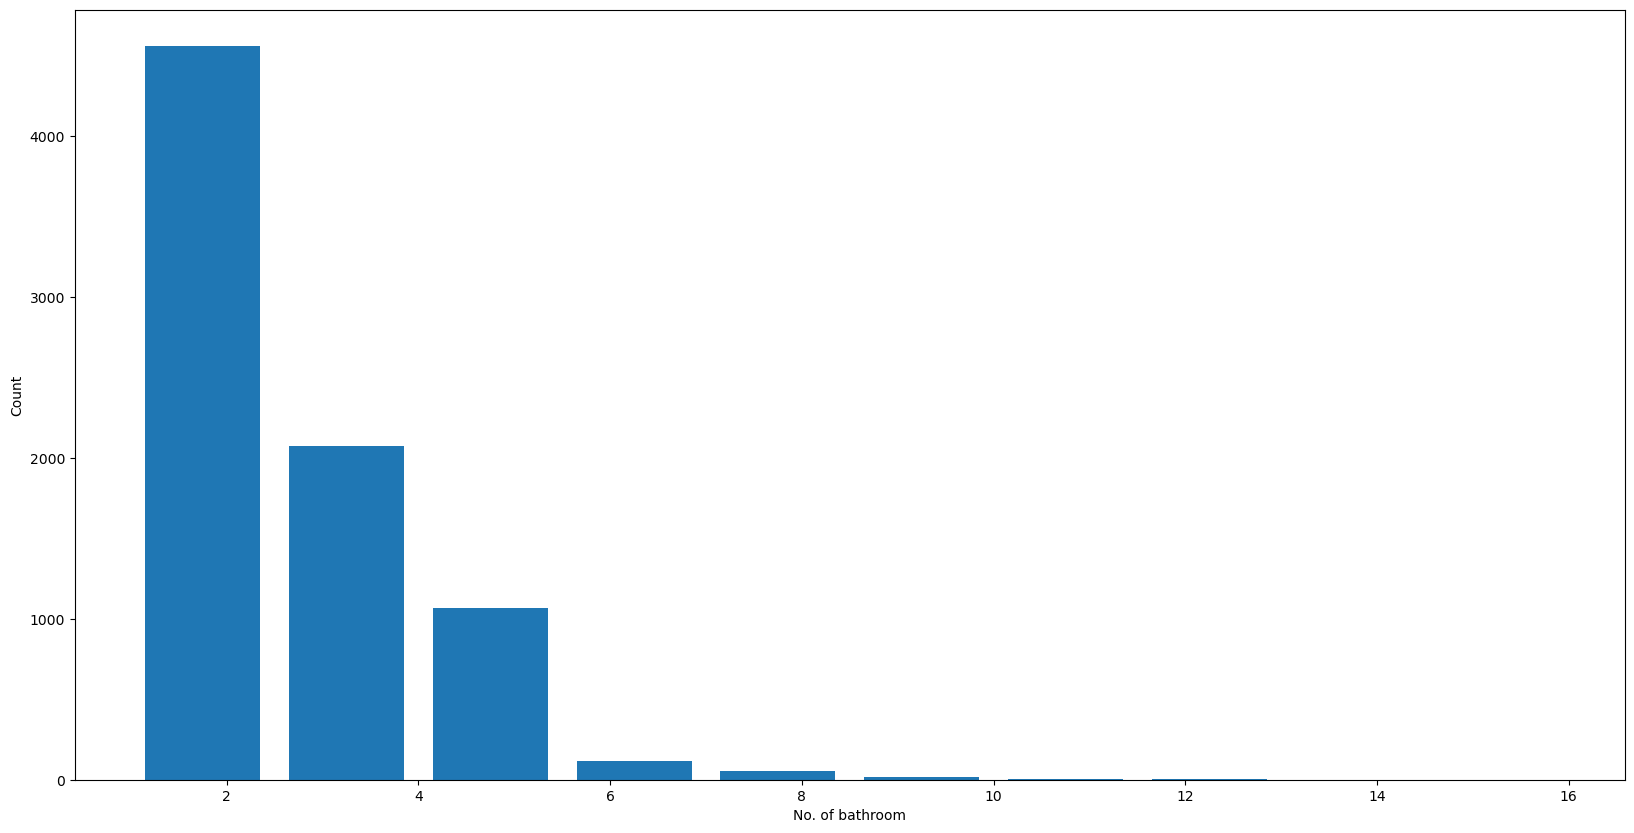

In [42]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('No. of bathroom')
plt.ylabel('Count')

In [43]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head()

,location,total_sqft,bath,price,BHK
2,Uttarahalli,1440.0,2.0,62.0,3
3,Lingadheeranahalli,1521.0,3.0,95.0,3
4,Kothanur,1200.0,2.0,51.0,2
7,Rajaji Nagar,3300.0,4.0,600.0,4
11,Whitefield,2785.0,5.0,295.0,4


Using one hot encoding for location

In [44]:
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
df10 = pd.concat([df9, dummies.drop('other',axis = 'columns')],axis = 'columns')
df10.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
2,Uttarahalli,1440.0,2.0,62.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Lingadheeranahalli,1521.0,3.0,95.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Kothanur,1200.0,2.0,51.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
df11 = df10.drop('location',axis ='columns')
df11.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
2,1440.0,2.0,62.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,95.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,51.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,3300.0,4.0,600.0,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,2785.0,5.0,295.0,4,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [47]:
df11.shape

(7894, 245)

Building model

In [48]:
X = df11.drop('price',axis = 'columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
2,1440.0,2.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,3300.0,4.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,2785.0,5.0,4,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [49]:
Y = df11.price
Y.head()

2      62.0
3      95.0
4      51.0
7     600.0
11    295.0
Name: price, dtype: float64

Splitting in training and testing sample

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 1)

In [51]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.4208617517943669

Using cross-validation method

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size = 0.2,random_state = 0)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.41254845, 0.39417791, 0.45678324, 0.43674682, 0.38995277])

In [53]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept':[True,False],
                'copy_X':[True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,lasso,0.314325,"{'alpha': 1, 'selection': 'cyclic'}"
1,linear_regression,0.418042,"{'copy_X': True, 'fit_intercept': True}"
2,decision_tree,0.535052,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [54]:
# from sklearn.metrics import r2_score

# from sklearn.linear_model import LinearRegression, Ridge,Lasso
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor

# regressors = [
#     KNeighborsRegressor(),
#     GradientBoostingRegressor(),
#     KNeighborsRegressor(),
#     ExtraTreesRegressor(),
#     RandomForestRegressor(),
#     DecisionTreeRegressor(),
#     LinearRegression(),
#     Lasso(),
#     Ridge()
# ]

# head = 10
# for model in regressors[:head]:
#     model.fit(X_train, Y_train)
#     y_pred = model.predict(X_test)
#     print(model)
#     print("\tR2 score:", r2_score(Y_test, y_pred))
#     print()

Since Gradient Boosting Regression has highest accuracy, will go for now gradient boosting technique
Various parameters needs to be tuned before prediction:
Learning Rate
Max Depth
number if estimators
subsample

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

Now we will build several trees to compaer our gradient boosting model. The tree wiull be different in the sense of max_depth. The max depth has to with the number of nodes python can make to try to purify thr classification. We will then decide which tree uis best based on the mean square error.

Cross Validation will help to check the acccuracy of the results.

In [56]:
# cv = ShuffleSplit(n_splits=5,test_size = 0.2,random_state = 0)

# for depth in range(1,10):
#     tree_regressor = tree.DecisionTreeRegressor(max_depth= depth, random_state=1)
#     if tree_regressor.fit(X_train,Y_train).tree_.max_depth<depth:
#         break
#     score=np.mean(cross_val_score(tree_regressor,X_train,Y_train,scoring='neg_mean_squared_error', cv=cv, n_jobs=1))
#     print(depth, score)

Now, we got max_depth =7 as it has the lowest error. Also, our baseline model has a mean squared error of 11360. We need to improve this in order to make gradient boosting superior.

Now we need to tune our hyperparameters which are:
number of estimators
learning rate
subsample
max depth

the number of estimators shows how many trees to create. The more trees the more likely to overfit.
The learning rate is the weight that each tree has on the final prediction.
Subsample is the propotion of the sample to use.

In [57]:
# GBR=GradientBoostingRegressor()
# search_grid ={ 'n_estimators':[500,1000,2000],
#               'learning_rate':[.001,.01,.1],
# #               'max_depth':[1,2,4],
#               'subsample':[.5,.75,1],
#               'random_state':[1]
#              }
# search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=cv)

search.fit(X_train,Y_train)
print (search.best_params_)
print(search.best_score_)

In [58]:
GBR2=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1,subsample=1,max_depth=2,random_state=1)
GBR2.fit(X_train,Y_train)
# Y_pred = GRB2.predict(X_test)
# print('RMSE:',np.sqrt(mean_squared_error(Y_test,Y_pred)))
score = np.mean(cross_val_score(GBR2,X_train,Y_train,scoring='neg_mean_squared_error',cv=cv,n_jobs=1))
score

-8219.000209822267

In [59]:
X_test

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
12242,1615.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4582,1200.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
746,1150.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1809,1800.0,1.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3653,2145.0,4.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11193,1300.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5736,2403.0,5.0,4,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
10963,1296.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10228,1420.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
GBR2.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=500, random_state=1,
                          subsample=1)

In [61]:
def price_prediction(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index >=0:
        x[loc_index]=1
        
    return GBR2.predict([x])[0]

In [62]:
price_prediction('1st Phase JP Nagar',1000,2,2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


70.66070355648525

In [63]:
price_prediction('1st Phase JP Nagar',1000,3,3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


94.03586078286843

In [64]:
price_prediction('Indira Nagar',1000,2,2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


124.60238453221903

In [65]:
price_prediction('Indira Nagar',1000,3,3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


147.9775417586023

In [66]:
price_prediction('Rajaji Nagar',1640,3,3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


228.7795656632347

In [67]:
import pickle
with open('banglore_home_prices_model','wb') as f:
    pickle.dump(GBR2,f)

In [69]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))